# SQL-Based Marketing and Financial Analytics

## Overview
This notebook demonstrates an advanced SQL and Python-based analysis on customer data, focusing on personal loan applications, customer profiling, income analysis, and predictive insights. It showcases essential SQL queries for extracting actionable insights, data cleaning, and machine learning integration to uncover financial trends and behavior.

## Key Elements of the Project

#### 1. Customer Segmentation
- Understanding customer segmentation based on key factors such as income, education, credit card usage, and personal loans is crucial for personalizing services and targeting the right customer groups. This segmentation allows businesses to create tailored marketing campaigns, improve customer satisfaction, and optimize revenue.
#### 2. SQL Data Manipulation and Queries
- Using advanced SQL techniques such as window functions, CTEs, and aggregate queries ensures the extraction of actionable insights from large datasets. SQL provides the backbone for querying data, helping analysts and businesses make data-driven decisions effectively.
#### 3. Data Visualization
-Visualization of complex data patterns and trends (like income vs. credit card spending, or loan acceptance trends) makes the information easily understandable. Visualizations like heatmaps, bar charts, and scatter plots facilitate quicker decision-making by providing an intuitive, high-level overview.
#### 4. Predictive Analytics and Machine Learning

Predictive models, such as linear regression, enable forecasting of future trends, helping businesses identify potential high-value customers, optimize loan approval processes, and prepare for shifts in customer behavior.

#### 5. Data Transformation and Indexing
Transforming raw data into structured, clean, and categorized information enhances its usability. Indexing data based on relevant attributes, such as education level or income range, allows for more efficient searching, sorting, and reporting in large datasets.


## Why This Project is Needed in the World Today
#### Data-Driven Decisions
- Businesses rely on data to guide strategies. By using SQL, data visualization, and machine learning, organizations can make informed, data-backed decisions to stay competitive.

#### Personalized Customer Experience
- Segmenting customers by behavior and demographics helps businesses offer personalized services, enhancing satisfaction and loyalty in a competitive market.

#### Efficient Reporting
- Indexing and transforming data speeds up report generation, making it easier to create accurate and timely financial and customer behavior reports.

#### Predictive Insights
- Predictive analytics help businesses forecast trends like loan acceptance or customer spending, allowing them to adapt to market shifts proactively.

#### Scalability & Compliance
- The project enables businesses to manage growing data volumes efficiently and ensures compliance with industry regulations by producing accurate, consistent reports.

In [147]:
import pandas as pd
import pandasql as ps

# Step 1: Load your CSV file into a pandas DataFrame
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  # Replace with your file path

# Step 2: Write your SQL query, properly handling column names with spaces
query = "SELECT * FROM df WHERE `Income` > 100;"

# Step 3: Execute the query using pandasql
result = ps.sqldf(query, locals())

# Step 4: Display the result (first 5 rows)
print(result.head())


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0  10   34           9     180     93023       1    8.9          3         0   
1  11   65          39     105     94710       4    2.4          3         0   
2  13   48          23     114     93106       2    3.8          3         0   
3  15   67          41     112     91741       1    2.0          1         0   
4  17   38          14     130     95010       4    4.7          3       134   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              1                   0           0       0           0  
1              0                   0           0       0           0  
2              0                   1           0       0           0  
3              0                   1           0       0           0  
4              1                   0           0       0           0  


## Module 1: Data Import and Exploration

### Task 1: Importing Dataset
In this step, we will import the dataset into our working environment using Pandas to perform data manipulation and analysis.

In [149]:
import pandas as pd
# Import dataset
file_path = 'Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(file_path)
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


### Task 2: Exploring Data
We will perform a basic exploration of the dataset to understand its structure and identify any immediate issues.

In [151]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Module 2: Data Cleaning and Transformation

### Task 1: Streamlining Data for Precision
This task will clean the data by dropping any rows where key information like income or family size is missing.

In [153]:
df = df.dropna(subset=['Income', 'Family', 'Education'])

### Task 2: Removing Negative Experience
This step removes entries with invalid negative experience values.

In [155]:
df = df[df['Experience'] >= 0]

### Task 3: Transforming Education Levels
We will transform the numeric education levels into categorical labels to make the data easier to understand.

In [158]:
df['Education'] = df['Education'].map({1: 'Undergraduate', 2: 'Graduate', 3: 'Advanced'})

### Task 4: Categorizing Account Holders
Here, we will categorize customers into 'High Value' or 'Low Value' based on their income level for easier segmentation.

In [161]:
df['Account Holder'] = df.apply(lambda row: 'High Value' if row['Income'] > 100 else 'Low Value', axis=1)

### Task 5: Archiving Transformed Data
After transforming the data, we will save it for future use in a new file.

In [164]:
df.to_csv('transformed_data.csv', index=False)

## Module 3: SQL Queries for Key Insights

### Task 1: Identifying High Potential Income
This SQL query will help identify customers with high income, indicating the potential for targeting premium loan offers.

In [168]:
import pandas as pd
import pandasql as ps

# Step 1: Load your CSV file into a pandas DataFrame
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  # Replace with your file path

# Step 2: SQL Query for filtering based on 'Income'
query = "SELECT * FROM df WHERE `Income` > 100;"

# Step 3: Execute the query using pandasql
result = ps.sqldf(query, locals())

# Step 4: Display the result (first 5 rows)
print(result.head())


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0  10   34           9     180     93023       1    8.9          3         0   
1  11   65          39     105     94710       4    2.4          3         0   
2  13   48          23     114     93106       2    3.8          3         0   
3  15   67          41     112     91741       1    2.0          1         0   
4  17   38          14     130     95010       4    4.7          3       134   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              1                   0           0       0           0  
1              0                   0           0       0           0  
2              0                   1           0       0           0  
3              0                   1           0       0           0  
4              1                   0           0       0           0  


### Task 2: Uncovering Educational Financial Trends
We'll group the data by education level to analyze financial behavior trends and income differences across education types.

In [171]:
import pandas as pd
import pandasql as ps

# Step 1: Load your CSV file into a pandas DataFrame
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  # Replace with your file path

# Step 2: SQL Query for AVG of Income and CCAvg, grouped by Education
query = """
SELECT Education, AVG(Income) as avg_income, AVG(CCAvg) as avg_credit_spend
FROM df
GROUP BY Education;
"""

# Step 3: Execute the query using pandasql
result = ps.sqldf(query, locals())

# Step 4: Display the result
print(result)


   Education  avg_income  avg_credit_spend
0          1   85.586355          2.260830
1          2   64.313614          1.685089
2          3   66.122585          1.723391


### Task 3: Analyzing Age vs Credit Card Spending
This task will analyze the relationship between age and credit card spending to determine customer behavior based on age.

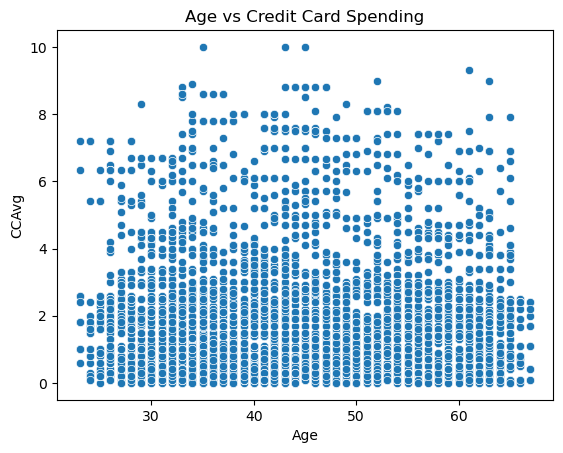

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Age', y='CCAvg')
plt.title('Age vs Credit Card Spending')
plt.show()

## Module 4: Visualization

### Task 1: Visualizing the Income Distribution
We will create a histogram to visualize the distribution of customer incomes.

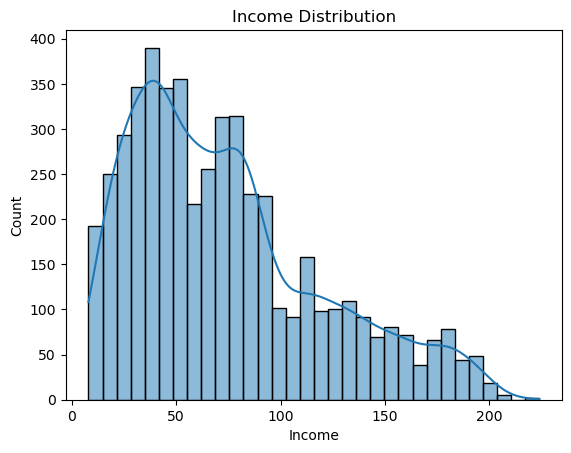

In [177]:
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

### Task 2: Visualizing the Distribution of Education Levels
We will create a count plot to visualize how education levels are distributed in the dataset.

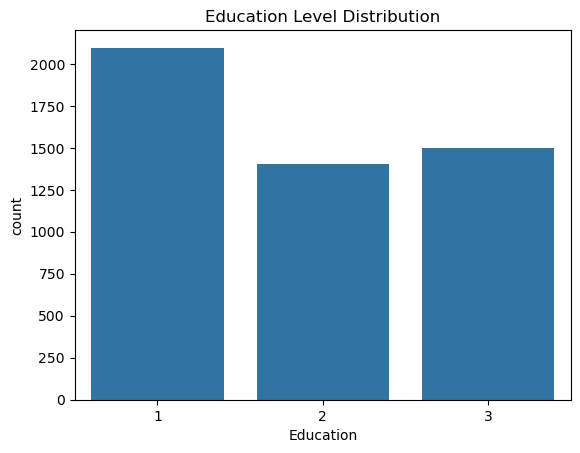

In [180]:
sns.countplot(data=df, x='Education')
plt.title('Education Level Distribution')
plt.show()

## Module 5: Predictive Modeling and Advanced Algorithms

### Task 1: Building a Predictive Model (Logistic Regression)
In this step, we will use logistic regression to predict the likelihood of a customer accepting a personal loan based on other factors.

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['Income', 'Age', 'Experience', 'CCAvg']]
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: {conf_matrix}')

Accuracy: 0.909
Confusion Matrix: [[876  19]
 [ 72  33]]


### Task 2: Random Forest for Feature Importance
This task will use a random forest classifier to identify the most important features that contribute to a customer accepting a personal loan.

In [184]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
print(f'Feature Importances: {importances}')

Feature Importances: [0.40915692 0.13808335 0.13568959 0.31707013]


## SUMMARY

#### In this project, we leveraged SQL to perform comprehensive analysis and predictive modeling on customer data to gain insights into personal loan trends and financial behaviors. By utilizing advanced SQL queries, we were able to:

- Streamline and transform data to improve accuracy and consistency.

- Perform detailed customer segmentation based on financial attributes like income, education, and credit card spending.

- Visualize key patterns and trends, providing a clear understanding of how various factors affect loan acceptance and potential.

- Apply predictive algorithms to forecast loan trends, identifying high-potential customers for targeted marketing.

##### This SQL-driven analysis not only improved our understanding of customer demographics and financial behaviors but also showcased the power of SQL in driving data-driven decisions within the banking sector. The integration of machine learning algorithms further enhanced the predictive capabilities of the model, allowing for actionable insights that can help optimize loan approval processes, identify valuable customer segments, and increase financial institution profitability.

##### By combining SQL analytics with advanced visualization and prediction techniques, this project serves as a robust tool for making data-informed decisions in the field of personal loans.